Optimal solution: [3.  0.5]
Iterations before minimum: 11


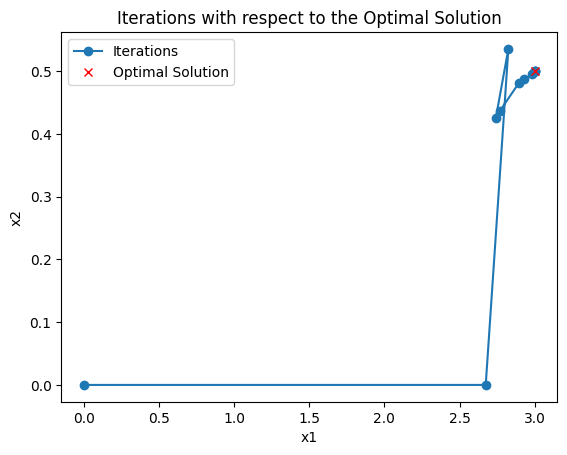

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Beale function
def beale_function(x):
    x1, x2 = x
    return (1.5 - x1 + x1 * x2)**2 + (2.25 - x1 + x1 * x2**2)**2 + (2.625 - x1 + x1 * x2**3)**2

# Define the gradient of the Beale function
def beale_gradient(x):
    x1, x2 = x
    grad_x1 = 2 * (1.5 - x1 + x1 * x2) * (-1 + x2) + \
              2 * (2.25 - x1 + x1 * x2**2) * (-1 + x2**2) + \
              2 * (2.625 - x1 + x1 * x2**3) * (-1 + x2**3)
    grad_x2 = 2 * (1.5 - x1 + x1 * x2) * x1 + \
              2 * (2.25 - x1 + x1 * x2**2) * 2 * x1 * x2 + \
              2 * (2.625 - x1 + x1 * x2**3) * 3 * x1 * x2**2
    return np.array([grad_x1, grad_x2])

# Define the backtracking line search
def backtracking_line_search(x, descent_dir, grad, func, alpha=0.3, beta=0.8):
    t = 1.0
    while func(x + t * descent_dir) > func(x) + alpha * t * np.dot(grad, descent_dir):
        t *= beta
    return t

# Define the secant method for Hessian approximation update
def secant_update(B, s, y):
    Bs = np.dot(B, s)
    yBs = np.dot(y - Bs, s)
    B += np.outer(y, y) / np.dot(y, s) - np.outer(Bs, Bs) / np.dot(s, Bs)
    return B

# Define a function to compute the Euclidean norm of a vector
def euclidean_norm(v):
    return np.sqrt(np.sum(v**2))

# Define a function to invert a 2x2 matrix
def invert_matrix_2x2(M):
    det = M[0, 0] * M[1, 1] - M[0, 1] * M[1, 0]
    if det == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")
    inv_det = 1.0 / det
    return inv_det * np.array([[M[1, 1], -M[0, 1]], [-M[1, 0], M[0, 0]]])


# Define the hybrid optimization algorithm
def hybrid_optimization(x0, tol=1e-6, max_iter=100):
    x = x0
    B = np.eye(len(x))  # Initial Hessian approximation (identity matrix)
    iteration_count = 0  # Initialize iteration count
    solutions = [x]  # List to store the solution at each iteration
    for i in range(max_iter):
        grad = beale_gradient(x)
        if euclidean_norm(grad) < tol:
            break

        # Compute the descent direction using the Hessian approximation
        B_inv = invert_matrix_2x2(B)
        descent_dir = -np.dot(B_inv, grad)

        # Perform backtracking line search to find the step size
        step_size = backtracking_line_search(x, descent_dir, grad, beale_function)

        # Update the position
        x_new = x + step_size * descent_dir

        # Update the Hessian approximation using the secant method
        s = x_new - x
        y = beale_gradient(x_new) - grad
        B = secant_update(B, s, y)

        x = x_new
        solutions.append(x)  # Store the new solution
        iteration_count += 1  # Increment iteration count

    return x, iteration_count, solutions  # Return the solution, iteration count, and all solutions

# Example usage:
initial_guess = np.array([0, 0])  # Starting point for optimization
optimal_solution, iterations, all_solutions = hybrid_optimization(initial_guess)
print("Optimal solution:", optimal_solution)
print("Iterations before minimum:", iterations)

# Plot the iterations with respect to the optimal solution
all_solutions = np.array(all_solutions)
plt.plot(all_solutions[:, 0], all_solutions[:, 1], 'o-', label='Iterations')
plt.plot(optimal_solution[0], optimal_solution[1], 'rx', label='Optimal Solution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Iterations with respect to the Optimal Solution')
plt.legend()
plt.show()
